In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances
from sklearn.metrics import silhouette_score
from sklearn.decomposition import  PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [54]:
table = pd.read_csv('./iris.txt', header=None, sep=" ")

In [55]:
data_np = table.to_numpy()

In [56]:
pca = TSNE(n_components=2, init='pca' ,n_iter=10000, perplexity=15)
data = pca.fit_transform(data_np)
scaler = MinMaxScaler(feature_range=(1,100))
data = scaler.fit_transform(data)

/Users/bhabaranjanpanigrahi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/bhabaranjanpanigrahi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


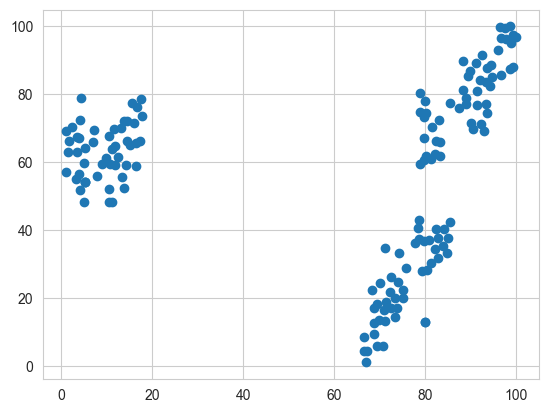

In [57]:
plt.scatter(data[:,0],data[:,1])

In [58]:
def generateKCentroid(data, k):
    random_index = [ np.random.randint(0,data.shape[0],size=data.shape[1]) for i in range(k)]
    centroids = []
    for i in range(len(random_index)):
        curr = random_index[i]
        build_centroid = []
        for j in range(len(curr)):
            build_centroid.append(data[curr[j],j])
        centroids.append(build_centroid)
    return np.array(centroids)

In [59]:
def calculateInertia(data_set, centroid, cluster_assigned):
    sum_of_squared_distance = 0
    cluster_assigned = np.array(cluster_assigned)
    centroid = np.array(centroid)
    for i in range(cluster_assigned.shape[0]):
        distance = euclidean_distances(data_set[i].reshape(1,-1), centroid[cluster_assigned[i]].reshape(1,-1))
        sum_of_squared_distance += (distance*distance)
    return sum_of_squared_distance

In [60]:
def runKmeanClustering(cluster_size, train_data, centroids):
    iteration = 0
    while True:
        iteration += 1
        restart = False
        distance_e = euclidean_distances(train_data, centroids)
        distance_cosine = cosine_similarity(train_data, centroids)
        distance_manhatten = manhattan_distances(train_data, centroids)
        distance = distance_e
        distance += distance_manhatten
        distance += (1/distance_cosine)
        cluster_assigned  = np.argmin(distance, axis=1)
        cluster_bucket = {}

        for i in range(cluster_size):
            cluster_bucket[i] = []

        for index in range(cluster_assigned.shape[0]):
            cluster_bucket[cluster_assigned[index]].append(train_data[index])

        for cluster in range(cluster_size):
            if len(cluster_bucket[cluster]) == 0:
                print("cluster ===> "+ str(cluster) + " does not have any data points" )
                centroids = generateKCentroid(data, cluster_size)
                restart = True
        if restart:
            print("re-initializing centroids")
            continue
        centroid_of_cluster = []

        for cluster in range(cluster_size):
            # print(len(cluster_bucket[cluster]))
            centroid_of_cluster.append(np.mean(np.array(cluster_bucket[cluster]) ,axis=0))

        if np.array_equal(centroid_of_cluster, centroids):
            return centroids, cluster_assigned
        else:
            centroids = np.array(centroid_of_cluster)

In [61]:
save_cluster =[]
save_intertia = []
for i in range(500):
    print("iteration:================================================>",i)
    k_centroids, assigned_cluster = runKmeanClustering(3, data, generateKCentroid(data,3))
    save_cluster.append(assigned_cluster)
    save_intertia.append(calculateInertia(data,k_centroids,assigned_cluster))

index = np.argmin(save_intertia)

iteration:================================================> 0
iteration:================================================> 1
iteration:================================================> 2
iteration:================================================> 3
iteration:================================================> 4
iteration:================================================> 5
iteration:================================================> 6
iteration:================================================> 7
iteration:================================================> 8
iteration:================================================> 9
iteration:================================================> 10
iteration:================================================> 11
iteration:================================================> 12
iteration:================================================> 13
iteration:================================================> 14
iteration:================================================> 15
it

In [62]:
print(index)
choosen_cluster = save_cluster[index]

0


In [63]:
choosen_cluster += 1

In [64]:
choosen_cluster

array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 2, 2, 1, 1,
       1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3])

In [65]:
z = silhouette_score(data, choosen_cluster)
print(z)

0.7522649


In [66]:
outfile = open('./iris_results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], choosen_cluster))
outfile.close()